# Lecture #4: Implementing Tools from Paper \#1
## The last step: Clustering

We begin this section of the lecture by forgetting about the load curves we created in the last section and, instead, focusing our attention on the technical aspects of clustering. Specifically, we will answer questions such as:

* What is clustering? 
* When is it useful? 
* What do different clustering algorithms have in common? 
* How is k-Means different/similar to other clustering approaches?

We will finalize this section with an implementation of k-Means clustering on a toy dataset.

Clustering is the process of segmenting a dataset, say $X \in R^{n\times p}$, where $n$ is the number of samples and $p$ is the number of attributes for each sample. By segmenting, we mean dividing up the $n$ rows of $X$ into multiple (say $k$) disjoint segments, based on the attributes of each sample (row) or the similarity between this sample and others. It is an unsupervised approach in the sense that it tries to learn useful properites of the joint density $P(X)$ without any supervision (i.e., no assistance from another set of variables, or a '*teacher*'.

For problems where $p$ is small (e.g., 3 or less), simply graphically showing the dataset X can lead one to visually segment the data. In higher dimensions, the problem becomes much trickier. That said, even this low-dimensional case reveals the most difficult challenge with clustering: the usefulness of the segmentation results lies, like beauty, in the eye of the beholder.

One of the goals of cluster analysis is to ensure that those data points that are assigned to the same cluster are more closely related (i.e., have a higher similarity) than those that are not assigned to the cluster. Hence, the notion of how similar two data points are is central to this method. Of course, the choice of this similarity metric is a matter of opinion (ultimately), since the data is just the data and whatever the clustering results are, there is nothing wrong with them per se.

If the clustering method uses the similarity as the guiding metric for making decisions about segmentation, like k-Means does, then we can begin by providing a general definition of dis-similarity (from here on dissimilarity) between any two pair of datapoints as $d_j(x_{ij},x_{i'j})$ and the a matrix $D \in R^{n\times n}$ nof dissimilarity values for every pair of data points can be defined as follows:

$D(x_i, x_{i'}) = \sum_{j=1}^{p}{d_j(x_{ij},x_{i'j})}$

A very common choice of this dissimilarity measure (or distnace measure) is the squared distance:

$d_j(x_{ij},x_{i'j})=(x_{ij} - x_{i'j})^2$

This leads to a matrix $D$ that contains the Euclidean distances between every pair of data points.

Let's try this out

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I will begin by creaing a synthetic dataset with $p=2$ and $n=1500$. Let's assume that the data comes from three 2-dimensional isotropic Gaussian distributions (i.e., the actual $k=3$).

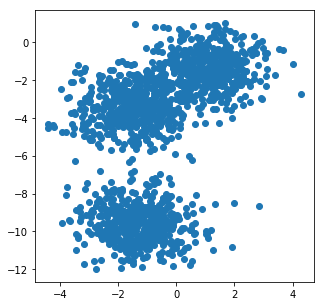

In [58]:
from sklearn.datasets import make_blobs

plt.figure(figsize=(5, 5))

n = 1500
p = 2
k = 3

random_seed = 2

X, y = make_blobs(n_features=p, centers=k, n_samples=n, random_state=random_seed)
plt.scatter(X[:, 0], X[:, 1])

This dataset, though it comes from 3 different distributions, visually seems to break down into two natural clusters. Let's add colors to see where the samples come from (i.e., which distribution):

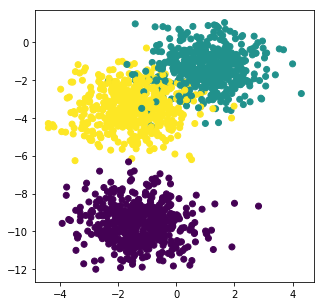

In [59]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0],X[:,1],c=y)

Say we wanted to compute the distance between every pair of points in dataset X.

In [56]:
import scipy.spatial.distance as dist

In [60]:
D = dist.squareform(dist.pdist(X),'euclidean')

## Total Scatter

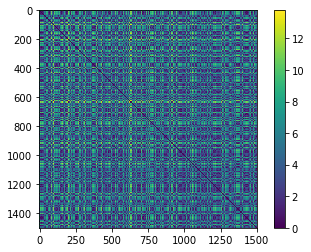

In [109]:
plt.imshow(D)
plt.colorbar()

The total scatter can be easily computed by summing over rows and columns of matrix $D$:

In [107]:
T = lambda D: np.sum(np.sum(D))
print(T(D))

10610371.6329


Given any random cluster assignment for all points:

In [76]:
y_guess = np.random.choice(np.unique(y),size=len(y))

The first step on k-Means is to compute the centroid for each of the clusters:

In [115]:
xbar1 = np.sum(X[y_guess==0],axis=0)/len(X[y_guess==0])


[-0.57196112 -4.85796033]


... you can continue on your own (or wait until the next lecture).